# Data

- $C=\{1,2,3,4,5,6,7,8\}$ $\leftarrow$ set of cities to visit.

- $n = 8$ $\leftarrow$ number of cities.

- $T = (1,2,3,4,5,6,7,8)$ $\leftarrow$ current tour.

In [27]:
tour = [1, 2, 3, 4, 5, 6, 7, 8]

 - Coordinates of each city:

In [2]:
coords = (
    # x   y    city
    (86, 37), # 1
    (17, 94), # 2
    ( 3, 65), # 3
    (48, 43), # 4
    (78, 70), # 5
    (17, 55), # 6
    (62, 91), # 7
    (78, 91)  # 8
)

- $D=(d_{ij})$, $i,j \in C$ $\leftarrow$ matrix of distances between cities.

In [3]:
import math
distances = [
    [
        int(math.hypot(abs(coords[i][0] - coords[j][0]), abs(coords[i][1] - coords[j][1])))
        if i != j else 0
        for j in range(len(coords))
    ]
    for i in range(len(coords))
]
distances

[[0, 89, 87, 38, 33, 71, 59, 54],
 [89, 0, 32, 59, 65, 39, 45, 61],
 [87, 32, 0, 50, 75, 17, 64, 79],
 [38, 59, 50, 0, 40, 33, 50, 56],
 [33, 65, 75, 40, 0, 62, 26, 21],
 [71, 39, 17, 33, 62, 0, 57, 70],
 [59, 45, 64, 50, 26, 57, 0, 16],
 [54, 61, 79, 56, 21, 70, 16, 0]]

# Objective

The objective is to get a tour $T$ that visits all cities in $C$, ending with the first city, such that the total distance of the tour is as minimal as possible.

$$
\begin{aligned}
& \underset{t \in T}{\text{min}}
& & \sum_{i=1}^{n} d_{t_i t_{i+1}}
\end{aligned}
$$

We already have a feasible solution, our current tour $T$, so we are going to use the *2-opt* heuristic to try to improve the tour according to the objective function, that is, to reduce the total distance.

Let's create a function to calculate the total cost (distance) of the tour:

In [66]:
def dist():
    return sum(distances[tour[i] - 1][tour[i + 1] - 1] for i in range(len(tour) - 1)) + distances[tour[-1] - 1][tour[0] - 1]

# Plotting

In order to illustrate each selected neighbor, we will declare a function to make the corresponding plot for every iteration:

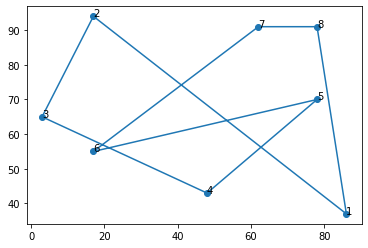

In [4]:
import matplotlib.pyplot as plt
def plot_tour():
    '''Plots the tour.'''
    x_coords = [c[0] for c in coords]
    y_coords = [c[1] for c in coords]
    plt.scatter(x_coords, y_coords)
    for city, tag in enumerate(i+1 for i in range(8)):
        plt.annotate(tag, (x_coords[city], y_coords[city]))
    global tour
    sorted_coords = [coords[k] for k in (t - 1 for t in tour + [tour[0]])]
    x_values = [c[0] for c in sorted_coords]
    y_values = [c[1] for c in sorted_coords]
    plt.plot(x_values, y_values)
    plt.show()

%matplotlib inline
plot_tour()

# 2-opt

The *2-opt* algorithm is a local search heuristic that consist in selecting two edges and swapping their nodes, e.g. $(a,b),(c,d) \rightarrow (a,c),(b,d)$. If the resulting tour has a lower cost, then it becomes the current solution. This is repeated until no improvement has been made.

Let's create a function to reverse the order of the cities between indexes $b$ and $c$ (following the example above), including both. This is the same as swapping the nodes:

In [13]:
def swap(b, c):
    '''Performs the 2-opt algorithm.'''
    subtour = tour[b:c+1]
    return tour[:b] + subtour[::-1] + tour[c+1:]

The neighborhood of the current tour is formed by all the all the possible combinations of swapping non-adjacent edge pairs. If we don't take into account the neighbors that have the same order as the tour, the size of the neighborhood is given by the formula:
$$\frac{n(n-3)}{2}$$
where $n$ is the number of cities to visit. In this instance that number is $8$, so each possible tour has $20$ neighbors.

Now let's create a function to calculate and print the difference in cost of a neighbor against the current tour, that is, $\Delta x$.

In [45]:
def show_dx(swapped, b, c):
    '''Shows deltaX of swapped tour.'''
    a = 7 if b == 0 else b - 1
    d = 0 if c == 7 else c + 1
    removed_edges = distances[tour[a] - 1][tour[b] - 1] + distances[tour[c] - 1][tour[d] - 1]
    new_edges = distances[swapped[a] - 1][swapped[b] - 1] + distances[swapped[c] - 1][swapped[d] - 1]
    dx = new_edges - removed_edges
    print(f'{swapped} {dx:7g}')

The lower the $\Delta x$, the better the neighbor, because it indicates how much units of distance that neighbor adds, so if it's a negative value then it's decreasing the total cost.

## Best Found Strategy

This strategy consists in calculating the $\Delta x$ for every neighbor and selecting the one that makes the best improvement.

Let's define a function to show all the neighbors and calculate their $\Delta x$. This function should print the 20 neighbors of each tour:

In [51]:
def bfs():
    '''Shows all the neighbors of the current tour.'''
    for i in range(len(tour)):
        for j in range(i + 1, len(tour) - 1):
            neighbor = swap(i, j)
            show_dx(neighbor, i, j)

### First iteration

We will call the BFS function to see which neighbor of $T$ makes the best improvement:

In [53]:
bfs()

[2, 1, 3, 4, 5, 6, 7, 8]      62
[3, 2, 1, 4, 5, 6, 7, 8]      13
[4, 3, 2, 1, 5, 6, 7, 8]      -5
[5, 4, 3, 2, 1, 6, 7, 8]     -24
[6, 5, 4, 3, 2, 1, 7, 8]      18
[7, 6, 5, 4, 3, 2, 1, 8]       0
[1, 3, 2, 4, 5, 6, 7, 8]       7
[1, 4, 3, 2, 5, 6, 7, 8]     -26
[1, 5, 4, 3, 2, 6, 7, 8]     -79
[1, 6, 5, 4, 3, 2, 7, 8]     -30
[1, 7, 6, 5, 4, 3, 2, 8]      15
[1, 2, 4, 3, 5, 6, 7, 8]      62
[1, 2, 5, 4, 3, 6, 7, 8]     -12
[1, 2, 6, 5, 4, 3, 7, 8]      14
[1, 2, 7, 6, 5, 4, 3, 8]      76
[1, 2, 3, 5, 4, 6, 7, 8]      -4
[1, 2, 3, 6, 5, 4, 7, 8]     -40
[1, 2, 3, 7, 6, 5, 4, 8]      54
[1, 2, 3, 4, 6, 5, 7, 8]     -38
[1, 2, 3, 4, 7, 6, 5, 8]      15
[1, 2, 3, 4, 5, 7, 6, 8]      18


As we can see, the lowest $\Delta x$ reduces total cost by $79$ units, so we move the solution to its corresponding tour: $T \leftarrow (1, 5, 4, 3, 2, 6, 7, 8)$.

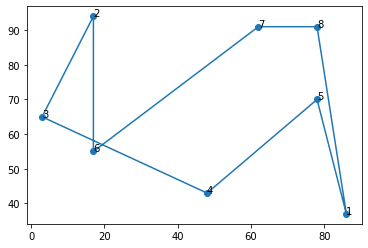

In [62]:
tour = [1, 5, 4, 3, 2, 6, 7, 8]
plot_tour()

### Second iteration

Let's see if we can improve the tour:

In [55]:
bfs()

[5, 1, 4, 3, 2, 6, 7, 8]     -35
[4, 5, 1, 3, 2, 6, 7, 8]      39
[3, 4, 5, 1, 2, 6, 7, 8]      82
[2, 3, 4, 5, 1, 6, 7, 8]      39
[6, 2, 3, 4, 5, 1, 7, 8]      18
[7, 6, 2, 3, 4, 5, 1, 8]       0
[1, 4, 5, 3, 2, 6, 7, 8]      30
[1, 3, 4, 5, 2, 6, 7, 8]      87
[1, 2, 3, 4, 5, 6, 7, 8]      79
[1, 6, 2, 3, 4, 5, 7, 8]       7
[1, 7, 6, 2, 3, 4, 5, 8]      31
[1, 5, 3, 4, 2, 6, 7, 8]      62
[1, 5, 2, 3, 4, 6, 7, 8]      19
[1, 5, 6, 2, 3, 4, 7, 8]      15
[1, 5, 7, 6, 2, 3, 4, 8]      26
[1, 5, 4, 2, 3, 6, 7, 8]     -13
[1, 5, 4, 6, 2, 3, 7, 8]     -10
[1, 5, 4, 7, 6, 2, 3, 8]      63
[1, 5, 4, 3, 6, 2, 7, 8]     -27
[1, 5, 4, 3, 7, 6, 2, 8]      77
[1, 5, 4, 3, 2, 7, 6, 8]      60


Indeed we can, the lowest $\Delta x$ is now $-35$. We can observe that only a few neighbors are better than the tour this time. The solution moves to $(5, 1, 4, 3, 2, 6, 7, 8)$.

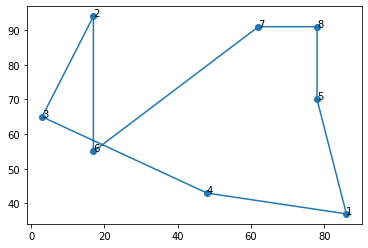

In [63]:
tour = [5, 1, 4, 3, 2, 6, 7, 8]
plot_tour()

### Third iteration

Let's check again the best neighbor by calling the BFS function:

In [57]:
bfs()

[1, 5, 4, 3, 2, 6, 7, 8]      35
[4, 1, 5, 3, 2, 6, 7, 8]      60
[3, 4, 1, 5, 2, 6, 7, 8]      91
[2, 3, 4, 1, 5, 6, 7, 8]      63
[6, 2, 3, 4, 1, 5, 7, 8]      18
[7, 6, 2, 3, 4, 1, 5, 8]       0
[5, 4, 1, 3, 2, 6, 7, 8]      44
[5, 3, 4, 1, 2, 6, 7, 8]      99
[5, 2, 3, 4, 1, 6, 7, 8]      64
[5, 6, 2, 3, 4, 1, 7, 8]      31
[5, 7, 6, 2, 3, 4, 1, 8]      31
[5, 1, 3, 4, 2, 6, 7, 8]      76
[5, 1, 2, 3, 4, 6, 7, 8]      45
[5, 1, 6, 2, 3, 4, 7, 8]      26
[5, 1, 7, 6, 2, 3, 4, 8]      61
[5, 1, 4, 2, 3, 6, 7, 8]     -13
[5, 1, 4, 6, 2, 3, 7, 8]     -10
[5, 1, 4, 7, 6, 2, 3, 8]      63
[5, 1, 4, 3, 6, 2, 7, 8]     -27
[5, 1, 4, 3, 7, 6, 2, 8]      77
[5, 1, 4, 3, 2, 7, 6, 8]      60


The lowest $\Delta x$ is $-27$ so the tour moves to its neighbor: $T \leftarrow (5, 1, 4, 3, 6, 2, 7, 8)$.

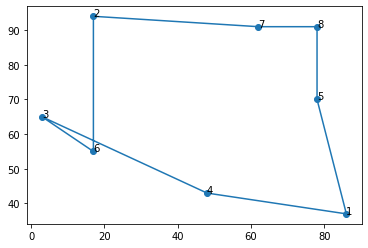

In [64]:
tour = [5, 1, 4, 3, 6, 2, 7, 8]
plot_tour()

### Fourth iteration

We will choose the best neighbor according to its $\Delta x$:

In [59]:
bfs()

[1, 5, 4, 3, 6, 2, 7, 8]      35
[4, 1, 5, 3, 6, 2, 7, 8]      60
[3, 4, 1, 5, 6, 2, 7, 8]     103
[6, 3, 4, 1, 5, 2, 7, 8]      75
[2, 6, 3, 4, 1, 5, 7, 8]      21
[7, 2, 6, 3, 4, 1, 5, 8]       0
[5, 4, 1, 3, 6, 2, 7, 8]      44
[5, 3, 4, 1, 6, 2, 7, 8]      96
[5, 6, 3, 4, 1, 2, 7, 8]      79
[5, 2, 6, 3, 4, 1, 7, 8]      46
[5, 7, 2, 6, 3, 4, 1, 8]      31
[5, 1, 3, 4, 6, 2, 7, 8]      65
[5, 1, 6, 3, 4, 2, 7, 8]      53
[5, 1, 2, 6, 3, 4, 7, 8]      56
[5, 1, 7, 2, 6, 3, 4, 8]      61
[5, 1, 4, 6, 3, 2, 7, 8]     -24
[5, 1, 4, 2, 6, 3, 7, 8]      28
[5, 1, 4, 7, 2, 6, 3, 8]      63
[5, 1, 4, 3, 2, 6, 7, 8]      27
[5, 1, 4, 3, 7, 2, 6, 8]     101
[5, 1, 4, 3, 6, 7, 2, 8]      63


We can see that the lowest value of $\Delta x$ is getting smaller every iteration. This time it reduces the tour's cost by $24$ units. Updating the tour: $T \leftarrow (5, 1, 4, 6, 3, 2, 7, 8)$.

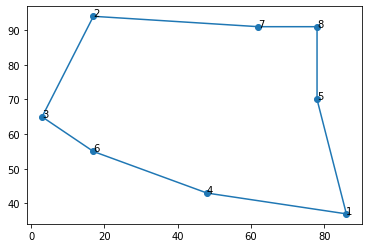

In [65]:
tour = [5, 1, 4, 6, 3, 2, 7, 8]
plot_tour()

### Fifth iteration

Let's try to improve our current solution by moving it to one of its neighbors:

In [61]:
bfs()

[1, 5, 4, 6, 3, 2, 7, 8]      35
[4, 1, 5, 6, 3, 2, 7, 8]      64
[6, 4, 1, 5, 3, 2, 7, 8]     107
[3, 6, 4, 1, 5, 2, 7, 8]      91
[2, 3, 6, 4, 1, 5, 7, 8]      21
[7, 2, 3, 6, 4, 1, 5, 8]       0
[5, 4, 1, 6, 3, 2, 7, 8]      45
[5, 6, 4, 1, 3, 2, 7, 8]      99
[5, 3, 6, 4, 1, 2, 7, 8]      99
[5, 2, 3, 6, 4, 1, 7, 8]      46
[5, 7, 2, 3, 6, 4, 1, 8]      31
[5, 1, 6, 4, 3, 2, 7, 8]      66
[5, 1, 3, 6, 4, 2, 7, 8]      76
[5, 1, 2, 3, 6, 4, 7, 8]      56
[5, 1, 7, 2, 3, 6, 4, 8]      61
[5, 1, 4, 3, 6, 2, 7, 8]      24
[5, 1, 4, 2, 3, 6, 7, 8]      38
[5, 1, 4, 7, 2, 3, 6, 8]      71
[5, 1, 4, 6, 2, 3, 7, 8]      41
[5, 1, 4, 6, 7, 2, 3, 8]     103
[5, 1, 4, 6, 3, 7, 2, 8]      77


No neighbor can improve the tour, as we can confirm by looking at the $\Delta x$ column, none of them is less than 0. This means that we have reached a local optimal.

## Conclusion

Using the Best Found Strategy of the *2-opt* heuristic, we get the solution $T = (5, 1, 4, 6, 3, 2, 7, 8)$. Let's calculate its total cost:

In [67]:
dist()

235

The local optimal solution $T$ has a cost of $235$ units of distance.

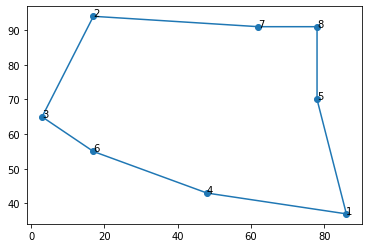

In [68]:
plot_tour()